# Spotipy
First we import the spotipy library to easily interface with the Spotify API, and <b>get the saved tracks</b>

In [25]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="data",
                                                           client_secret="data",
                                                           redirect_uri="http://localhost:8888/callback",
                                                           scope="user-library-read"))
offset = 0
#get all saved tracks from spotify changing offset to get all tracks
track_features = []
while True:
    results=sp.current_user_saved_tracks(limit=50,offset=offset)
    for item in results['items']:
        track = item['track']
        track_features.append(sp.audio_features(track['id']))
    offset+=50
    if offset+50>results['total']:
        break


In [26]:
print (len(track_features))


1450


## plotting data

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#convert all the features into a dataframe, NOT JUST THE FIRST
df=[]
for i in range(len(track_features)):
    df.append(pd.DataFrame(track_features[i]))
df = pd.concat(df)
df.drop(['type','id','uri','track_href','analysis_url'],axis=1,inplace=True)

In [28]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.774,0.604,11,-9.719,0,0.1320,0.0406,0.188,0.6700,0.379,118.020,268126,4
0,0.452,0.470,10,-18.173,0,0.0352,0.3910,0.893,0.1000,0.817,122.617,204535,4
0,0.750,0.625,5,-10.592,0,0.1390,0.4120,0.235,0.0767,0.784,96.064,229467,4
0,0.841,0.848,11,-9.026,0,0.0486,0.2340,0.715,0.1170,0.780,114.981,303507,4
0,0.757,0.720,8,-11.484,1,0.0440,0.2210,0.929,0.1530,0.905,116.370,328360,4


array([[<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>],
       [<AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>],
       [<AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

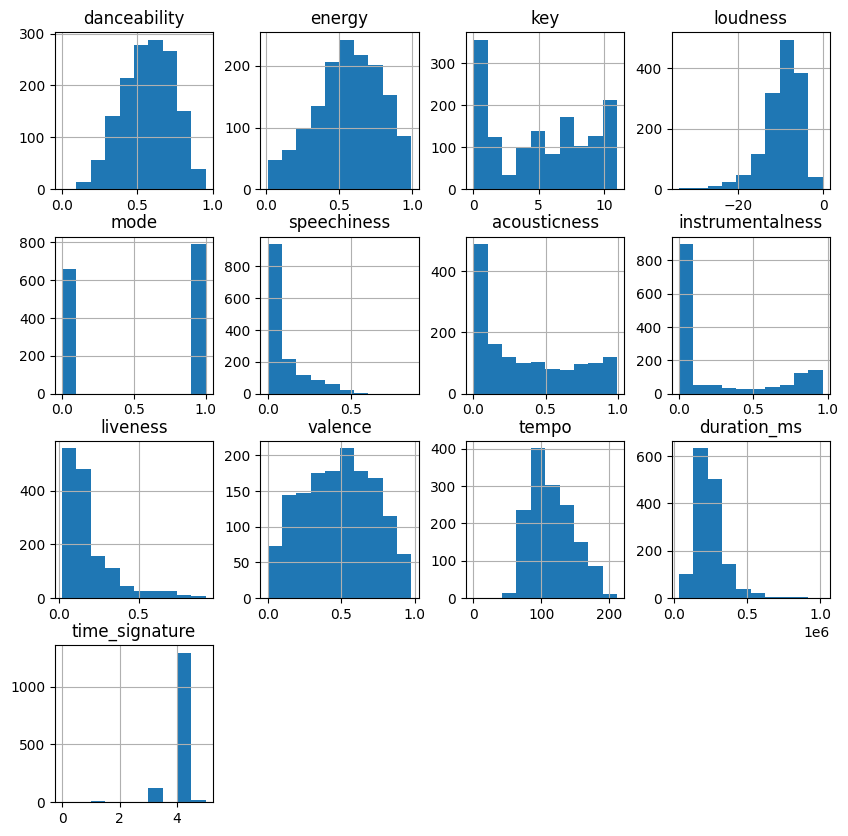

In [29]:
#plot mean for each feature
df.hist(figsize=(10,10))

<AxesSubplot: >

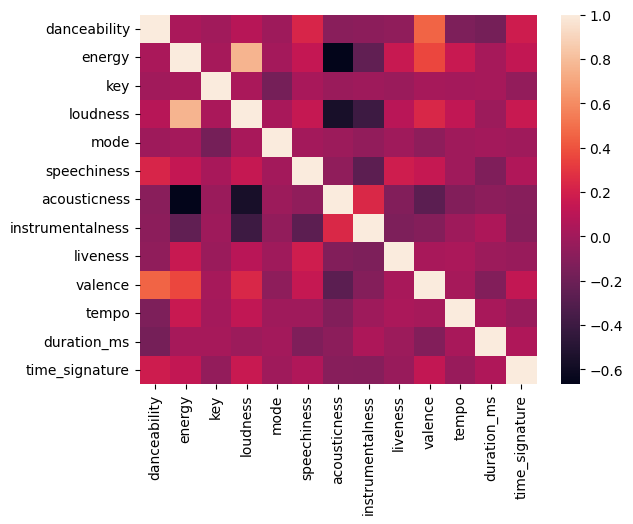

In [30]:
#show correlation between features
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
            

save as csv file

In [31]:
df.to_csv('spotifyLikes.csv')